# Activity: Perform multiple linear regression


## Introduction

As you have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [1]:
# Import libraries and modules.

### YOUR CODE HERE ### 

## imports

## DS & visuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")
sns.set_theme(style="whitegrid")

## Stats 
import scipy
from scipy import stats
## For encoding
#from sklearn.preprocessing import LabelEncoder

## Linear Regression
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

## scikitlearn
from sklearn.model_selection import train_test_split

##
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
import statsmodels.api as sm

import math
import pandas as pd
import numpy as np

## Graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Functions

################################################################################
##############  READABLE NUMBER ################################################
    
def readableNumbers(x):
    """
    Takes a large number and formats it into K,M to make it more readable
    Args:
        x: a number.
    Returns:
        A string easy to read information.
    Usage:
        # Use the readable_numbers() function to create a new column 
        df['readable'] = df['big_num'].apply(readable_numbers)

    """
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

################################################################################
############## FEATURE OBSERVE  ################################################

def feature_observe(dataframe: pd.DataFrame):
    
    """
    Recieve a dataframe and check for null elements, 
    it returns a dictionary with keys: message, feature
    over 5% and features between 0 and 5%, and its values.
    
    Args:
        df(pd.DataFrame): a pandas DataFrame
    """
    
    # Running validation on the argument recieved
    assert type(dataframe) == pd.DataFrame, f'{dataframe}, is not a pandas df.'
    
    # assing and reset values
    df = dataframe
    feat_look = []
    feat_kill = []
    for i in df.columns:
        pct_miss = (df.isnull().sum() / df.isnull().count())
        if (df[i].isnull().sum() / df[i].isnull().count()) > 0.05:
            feat_kill.append(i) 
        elif (df[i].isnull().sum() / df[i].isnull().count()) > 0:
            feat_look.append(i)
        else: pass
    lenghts = [len(feat_look), len(feat_kill)]
    elementos = [feat_look, feat_kill]
    results = {
        "message" : f"{lenghts[0]} features are missing less than 5%. And \
        {lenghts[1]} features are missing more than 5%.",
        "features over 5%" : elementos[1], 
        "features less 5%" : elementos[0]
    }
    return results

##################################################mario.hevia@gmail.com#########
######################### MISSING INFORMATION  #################################

def miss_df(dataframe: pd.DataFrame):
    """
    Take a pandas df as argument, returns another one
    with  basic information about missing data
    Args:
        df(pd.DataFrame): a pdDataFrame.
    """
    # Running validation on the argument recieved
    assert type(dataframe) == pd.DataFrame, f'{dataframe}, is not a pandas df.'
    df = dataframe
    total_missing = df.isnull().sum().sort_values(ascending=False)
    percent_missing = (df.isnull().sum()/df.isnull().count())\
    .sort_values(ascending=False)
    missing_data = pd.concat([total_missing, percent_missing], axis=1, \
                             keys=['Total', 'Percent'])
    return(missing_data.head(len(df.columns)))

######mario#####################################################################
#################   INVALID STRINGS   ##########################################

def invalid_df(dataframe: pd.DataFrame):
    """
    Take a pandas df as argument, looks for the items 
    in an invalid list. returns a pd df with
    the columns: column, nulls, invalids, 
    and the unique values.
    
    Args:
        df(pd.DataFrame): a pdDataFrame.
    """
    # Running validation on the argument recieved
    assert type(dataframe) == pd.DataFrame, f'{dataframe}, is not a pandas df.'
    df = dataframe
    
    invalid_list =\
    [np.nan, None, [], {}, 'NaN', 'Null','NULL'\
     ,'None','NA','?','-', '--','.','', ' ', '   ']
    
    columnas_con_invalidos = []
    nan_or_nones = []
    invalids = []
    uniques = []
    invalid_dict = {
        'column': columnas_con_invalidos,
        'nulls': nan_or_nones,
        'invalids': invalids, 
        'unique_item': []
    }
    for c in df.columns:
        string_null = np.array([x in invalid_list[2:] for x in df[c]])
        columnas_con_invalidos.append(c)
        nan_or_nones.append((df[c].isnull().sum()))
        invalids.append(string_null.sum())
        uniques.append(df[c].unique())
        invalid_dict = {
        'columns': columnas_con_invalidos,
        'nulls': nan_or_nones,
        'invalids': invalids,
        'unique_item': uniques
        }
        
    result = pd.DataFrame(invalid_dict)
    return(result.head(len(df.columns)))
 
######mario.hevia@gmail.com#####################################################
###############  SIFT DATA BY THE PD.TYPES #####################################
    
def siftdatatype(dataframe: pd.DataFrame):
    """
    Recive a pandas data frame as an argument
    returns a dictionary with a message and 
    keys categorical and numerical, the values
    are two list each corresponding to the keys.
    
    Args:
        df(pd.DataFrame): a pdDataFrame.
    """
    # Running validation on the argument recieved
    assert type(dataframe) == pd.DataFrame, f'{dataframe}, is not a pandas df.'
    df = dataframe
    # groupping columns with numbers, dtypes can increase in types len.
    num_features = df.select_dtypes(['int64', 'float64']).columns.to_list()
    # groupping object columns
    cat_features = df.select_dtypes(['object']).columns.to_list()
    lenghts = [len(num_features), len(cat_features)]
    elementos = [num_features, cat_features]
    results = {
        "message" : f"{lenghts[0]} features are numerical and {lenghts[1]}\
        features are categorical.",
        "nums" : elementos[0], 
        "objs" : elementos[1]
    }
    return results

################################################################################
#######################   FILL IN MISSINGA VALUES      #########################

def filler_of_the_nans(technique, df, list_to_fill):
    """
    Fill in nans of a fill_list from a pandas df,
    the fill list should be defined by the technique to use. 
    The options are mean, median, mode or interpolation.
    Returns a copy of the original dataframe, but filled.

    Args:
        technique (list): a technique to use, from the list
        df(pd.DataFrame): a pdDataFrame.
        fill_list (pd.Series): pd.Series or list of Series with
        missing values. 
        
    """
    #Running validation on the argument recieved
    tecnicas = ('mean', 'median', 'interpolation', 'mode', 'None')
    assert type(df) == pd.DataFrame, f'{df} is not a pandas df.'
    assert technique in tecnicas, f'{technique} not in options:\
        [mean|median|interpolation|mode|None]'
    technique = technique
    # Deffining and populating a dataframe
    dff = pd.DataFrame()
    dff = df.copy()

    if technique == 'mean':
        for i in list_to_fill:
            dff.loc[:, i] =  dff.loc[:, i].fillna(dff.loc[:, i].mean())
        return dff
    elif technique == 'median':
        for i in list_to_fill:
            dff.loc[:, i] =  dff.loc[:, i].fillna(dff.loc[:, i].median())
        return dff
    elif technique == 'interpolation':
        for i in list_to_fill:
            dff.loc[:, i] =  dff.loc[:, i].fillna(dff.loc[:, i].interpolate())
        return dff
    elif technique == 'mode':
        for i in list_to_fill:
            dff.loc[:, i] =  dff.loc[:, i].fillna(dff.loc[:, i].mode()[0])
        return dff
    elif technique == 'None':
        for i in list_to_fill:
            dff.loc[:, i] =  dff.loc[:, i].fillna('None')
        return dff
   
    else: return dff

################################################################################
######################  HISTOGRAM OF DESIRED  FEATURES #########################

def histogramas(df, features):
    """
    Show histograma.
    Take a pandas dataframe and a list
    of columns

    Args:
        df: a pdDataFrame.
        features: pd.Series or list of Series with
        desire values. 
    """
    plt.figure(figsize = (10, 35))
    for i, feature in enumerate(features):
        ax = plt.subplot(10, 3, i + 1)
        ax.hist(df[feature], bins=25, color='Orange', edgecolor='black',\
               label=feature, alpha=0.2)
        ax.set_title(feature + ' histogram')
        plt.xticks(rotation=45)
        plt.tight_layout(pad=5.0)
        

################################################################################
####################  KURTOSIS AND SKEWNESS ####################################

def kurt_skew(df, features):
    """
    Kurtosis and Skewness report.
    Take a pandas dataframe and a list
    of columns
    Args:
        df: a pdDataFrame.
        features: pd.Series or list of Series with
            desire values. 
    Returns a package with 3 objects to unpack.
    (info, list of columns, 
    """
    kurt = stats.describe(df[features]).kurtosis
    skew = stats.describe(df[features]).skewness
    # if the column is gretter than 0.5 is skew
    info = pd.DataFrame({'column': df[features].columns, 'kurtosis': abs(kurt), \
                         'skewness': abs(skew)})
    info['need_transformation'] = info['kurtosis'].\
    apply(lambda x: True if x >= 0.5 else False)
    
    # numerical columns that are skew and need attention.
    skewColumns = info.query('need_transformation == True')['column'].values
    
    return(histogramas(df, skewColumns), skewColumns, info)
    


##################################################mario.hevia@gmail.com#########
#######################  ESTADISTICAS  #########################################

def estadisticas(df: pd.core.frame.DataFrame, col: pd.core.series.Series ):
    
    """
    Recieve a dataframe and a column.
    returns a dataframe with num of observations, 
    min, max, mean, variance, skewness, kurtosis.
    
    Args:
        df(pd.DataFrame): a pandas DataFrame
        column: a pandas series
    """
    nobs, minMax, mean, variance, skewness, kurtosis = stats.describe(df[col])
    descriptive_stats = {}
    descriptive_stats['observations'] = nobs
    descriptive_stats['minimun'] = minMax[0]
    descriptive_stats['maximun'] = minMax[1]
    descriptive_stats['mean'] = mean
    descriptive_stats['variance'] = variance
    descriptive_stats['skewness'] = skewness
    descriptive_stats['kurtosis'] = kurtosis
    return pd.DataFrame.from_dict(descriptive_stats, orient='index', \
                                  columns=[col])

################################################################################
####################### Empirical Rule  ########################################

def empirical(df, col):
    """
    Recieve a dataframe and a column.
    Return a data frame with information related
    to the empirical rule compared to a column
    distribution.
    
    Args:
        df(pd.DataFrame): a pandas DataFrame
        column: a pandas series
    """
    mean = df[col].mean()
    SD   = df[col].std()
    
    lowerLim = mean - 1 * SD
    upperLim = mean + 1 * SD

    pct1 = round(((df[col] >= lowerLim) & (df[col] <= upperLim)).mean(), 2)

    ## 2SD from the mean

    lowerLim2 = mean - 2 * SD
    upperLim2 = mean + 2 * SD

    pct2 = round(((df[col] >= lowerLim2) & (df[col] <= upperLim2)).mean(), 2)

    ## 3SD from the mean
    
    lowerLim3 = mean - 3 * SD
    upperLim3 = mean + 3 * SD

    pct3 = round(((df[col] >= lowerLim3) & (df[col] <= upperLim3)).mean(), 2)
    
    lims = [pct1, pct2, pct3]
    suggestion = [0.68, 0.95, 0.997]
    
    rules = [[ pct1, suggestion[0], abs(pct1 - suggestion[0]) ], 
             [ pct2, suggestion[1], abs(pct2 - suggestion[1]) ], 
             [ pct3, suggestion[2], abs(pct3 - suggestion[2]) ]]
    index = ["Frac of the values within +/- 1 SD from the mean", 
             "Frac of the values within +/- 2 SD from the mean", 
             "Frac of the values within +/- 3 SD from the mean"]
    df = pd.DataFrame(rules, columns = [col, 'empirical_rule_suggest', \
                                        'difference'], index = index)
    
    return(df)

######mario.hevia@gmail.com#####################################################
######################  Distribution Report ####################################

def distribution(df, col):

    
    mean = df[col].mean()
    SD   = df[col].std()
    
    lowerLim = mean - 1 * SD
    upperLim = mean + 1 * SD

    pct1 = round(((df[col] >= lowerLim) & (df[col] <= upperLim)).mean(), 2)

    ## 2SD from the mean

    lowerLim2 = mean - 2 * SD
    upperLim2 = mean + 2 * SD

    pct2 = round(((df[col] >= lowerLim2) & (df[col] <= upperLim2)).mean(), 2)

    ## 3SD from the mean
    
    lowerLim3 = mean - 3 * SD
    upperLim3 = mean + 3 * SD

    pct3 = round(((df[col] >= lowerLim3) & (df[col] <= upperLim3)).mean(), 2)

    plt.figure(figsize=( 11.7,8.27))
    ax = plt.subplot()
    p = sns.histplot(data=df[col], kde=col, hue=None, legend=False)
    plt.legend(title='Values within 1, 2, 3 SD from the mean', loc='upper left',\
               labels=[pct1, pct2, pct3])
    ax.set_title(col)
    
    ax.axvline(x=lowerLim, color='r', linestyle='dotted')
    ax.axvline(x=upperLim, color='r', linestyle='dotted')
    
    ax.axvline(x=lowerLim2, color='b', linestyle='dashed')
    ax.axvline(x=upperLim2, color='b',linestyle='dashed')
    
    ax.axvline(x=lowerLim3, color='g', linestyle='dashdot')
    ax.axvline(x=upperLim3, color='g', linestyle='dashdot')
    ## qqplot from stats
    sm.qqplot(df[col], fit=True, line='45')
    
    plt.show(p)
    

################################################################################
################################################################################

### Load dataset

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 

path = '~/Scripts/DS/RegressionAnalysis/marketing_sales_data.csv'

data = pd.read_csv(path)

# Display the first five rows.

### YOUR CODE HERE ### 

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Nano," and "Micro" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?

[Write your response here. Double-click (or enter) to edit.]

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

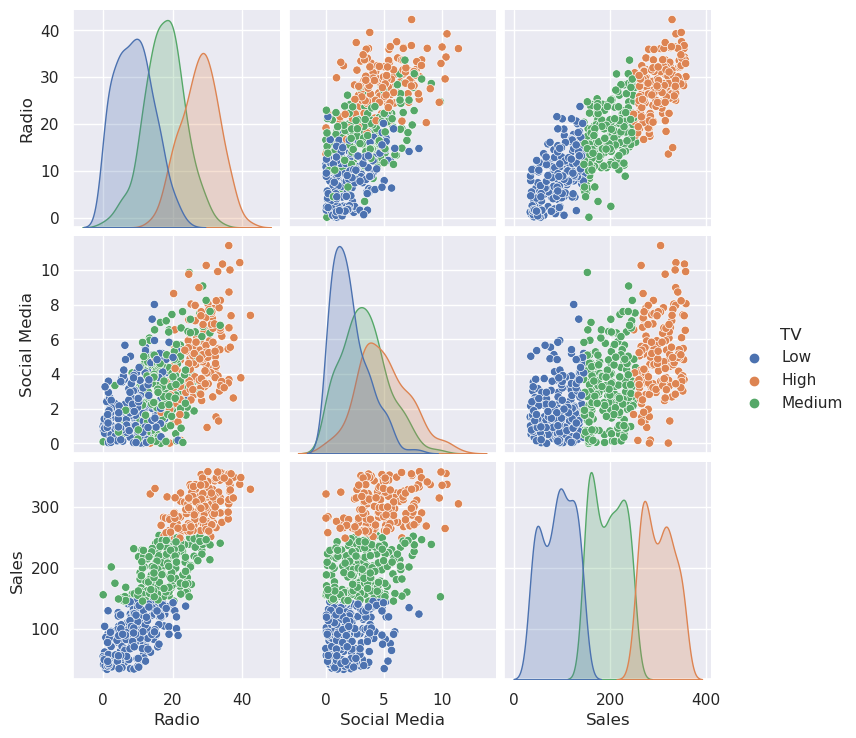

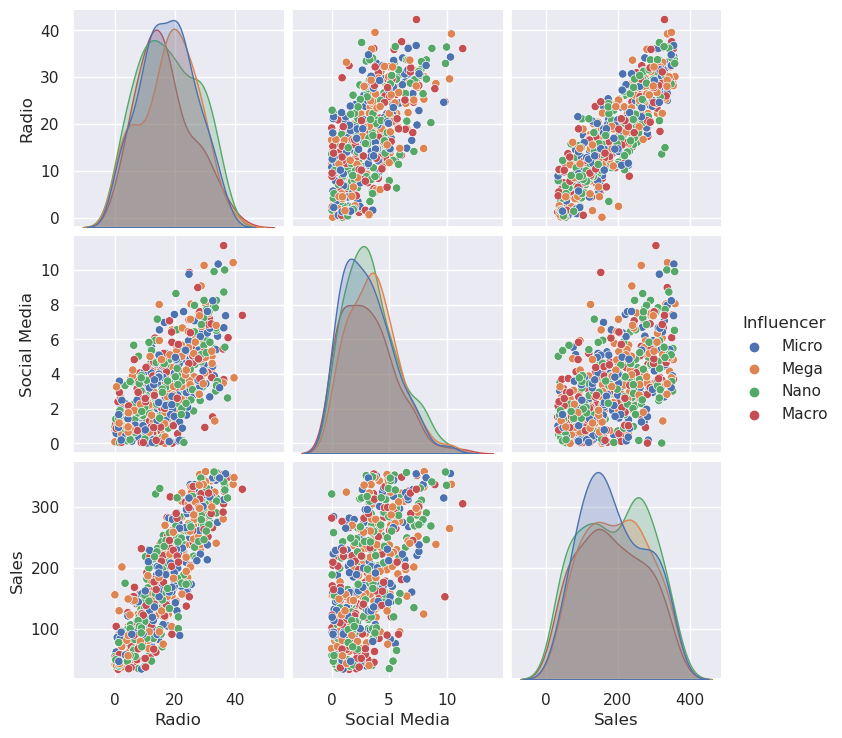

In [3]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sns.pairplot(data, hue='TV');
sns.pairplot(data, hue='Influencer');

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content where creating a pairplot is demonstrated](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/item/dnjWm).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a pairplot showing the relationships between variables in the data.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `pairplot()` function from the `seaborn` library and pass in the entire DataFrame.

</details>


**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



From the observed `radio` clearly have a more linear shape that `SocialMedia`, although lienarity is present in both

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [4]:
# Calculate the mean sales for each TV category. 

### YOUR CODE HERE ### 

low = data[data['TV'] == 'Low' ]
high = data[data['TV'] == 'High']
medium = data[data['TV'] == 'Medium']
lowSaleMean = low['Sales'].mean()
highSaleMean = high['Sales'].mean()
mediumSaleMean = medium['Sales'].mean()

# Calculate the mean sales for each Influencer category. 

### YOUR CODE HERE ### 

micro = data[data['Influencer'] == 'Micro']
mega  = data[data['Influencer'] == 'Mega']
nano  = data[data['Influencer'] == 'Nano']
macro = data[data['Influencer'] == 'Macro'] 

microSaleMean = micro['Sales'].mean()
megaSaleMean = mega['Sales'].mean()
nanoSaleMean = nano['Sales'].mean()
macroSaleMean = macro['Sales'].mean()

print('===========================')
print(f'low sale mean    : {round(lowSaleMean, 3)}')
print(f'high sale mean   : {round(highSaleMean, 3)}')
print(f'medium sale mean : {round(mediumSaleMean, 3)}')
print('===========================')
print(f'micro sale mean  : {round(microSaleMean, 3)}')
print(f'mega sale mean   : {round(megaSaleMean, 3)}')
print(f'nano sale mean   : {round(nanoSaleMean, 3)}')
print(f'macro sale mean  : {round(macroSaleMean, 3)}')
print('===========================')

low sale mean    : 90.984
high sale mean   : 300.853
medium sale mean : 195.358
micro sale mean  : 188.322
mega sale mean   : 194.488
nano sale mean   : 191.874
macro sale mean  : 181.67


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Find the mean `Sales` when the `TV` promotion is `High`, `Medium`, or `Low`.
    
Find the mean `Sales` when the `Influencer` promotion is `Macro`, `Mega`, `Micro`, or `Nano`.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `groupby` operation in `pandas` to split an object (e.g., data) into groups and apply a calculation to each group.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To calculate the mean `Sales` for each `TV` category, group by `TV`, select the `Sales` column, and then calculate the mean. 
    
Apply the same process to calculate the mean `Sales` for each `Influencer` category.

</details>

**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



`Tv` a bit more than `Influencer`. 


In [5]:
invalid_df(data)

,columns,nulls,invalids,unique_item
0,TV,0,0,"[Low, High, Medium]"
1,Radio,0,0,"[3.518069641, 7.75687576, 20.34898797, 20.1084..."
2,Social Media,0,0,"[2.293790324, 2.572286867, 1.227180495, 2.7283..."
3,Influencer,0,0,"[Micro, Mega, Nano, Macro]"
4,Sales,0,0,"[55.26128448, 67.57490362, 272.2501078, 195.10..."


In [6]:
miss_df(data)

,Total,Percent
TV,0,0.0
Radio,0,0.0
Social Media,0,0.0
Influencer,0,0.0
Sales,0,0.0


### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [7]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 
print('I dont think there is missing data, am I confused???')
data.dropna(inplace=True) # just in case

I dont think there is missing data, am I confused???


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `data.dropna(axis=0)` to drop all rows with missing values in `data`. Be sure to properly update the DataFrame.

</details>

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [8]:
# Rename all columns in data that contain a space. 

### YOUR CODE HERE ### 

data.columns = ['TV', 'Radio', 'SocialMedia', 'Influencer', 'Sales']
data.columns

Index(['TV', 'Radio', 'SocialMedia', 'Influencer', 'Sales'], dtype='object')

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is one column name that contains a space. Search for it in `data`.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `Social Media` column name in `data` contains a space. This is not allowed in the `ols()` function.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `rename()` function in `pandas` and use the `columns` argument to provide a new name for `Social Media`.

</details>

## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [9]:
# Define the OLS formula.

### YOUR CODE HERE ### 

X1 = data[['TV', 'Radio', 'SocialMedia', 'Influencer']]
y1 = data[['Sales']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, 
                                                    test_size = 0.3, random_state = 42)

ols_formula1 = " Sales ~ Radio + SocialMedia + C(TV) + C(Influencer)"

ols_data1 = pd.concat([X_train1, y_train1], axis = 1)

# Create an OLS model.

### YOUR CODE HERE ### 

OLS1 = ols(formula = ols_formula1, data = ols_data1)

# Fit the model.

### YOUR CODE HERE ### 

model1 = OLS1.fit()

# Save the results summary.

### YOUR CODE HERE ### 

results1 = model1.summary()

# Display the model results.

### YOUR CODE HERE ### 

print(results1)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     526.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          5.61e-195
Time:                        12:03:49   Log-Likelihood:                -1897.1
No. Observations:                 400   AIC:                             3810.
Df Residuals:                     392   BIC:                             3842.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                213

In [10]:
# Define the OLS formula.

### YOUR CODE HERE ### 

X2 = data[['TV', 'Radio', 'SocialMedia']]
y2 = data[['Sales']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, 
                                                    test_size = 0.3, random_state = 42)

ols_formula2 = " Sales ~ Radio + SocialMedia" 

ols_data2 = pd.concat([X_train2, y_train2], axis = 1)

# Create an OLS model.

### YOUR CODE HERE ### 

OLS2 = ols(formula = ols_formula2, data = ols_data2)

# Fit the model.

### YOUR CODE HERE ### 

model2 = OLS2.fit()

# Save the results summary.

### YOUR CODE HERE ### 

results2 = model2.summary()

# Display the model results.

### YOUR CODE HERE ### 

print(results2)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     619.8
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          7.81e-123
Time:                        12:03:49   Log-Likelihood:                -2082.2
No. Observations:                 400   AIC:                             4170.
Df Residuals:                     397   BIC:                             4182.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.4402      4.680      9.923      

In [11]:
# Define the OLS formula. 

### YOUR CODE HERE ### 

X3 = data[['TV', 'Radio']]
y3 = data[['Sales']]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, 
                                                    test_size = 0.3, random_state = 42)

ols_formula3 = "Sales ~ Radio + C(TV)" 

ols_data3 = pd.concat([X_train3, y_train3], axis = 1)

# Create an OLS model.

### YOUR CODE HERE ### 

OLS3 = ols(formula = ols_formula3, data = ols_data3)

# Fit the model.

### YOUR CODE HERE ### 

model3 = OLS3.fit()

# Save the results summary.

### YOUR CODE HERE ### 

results3 = model3.summary()

# Display the model results.

### YOUR CODE HERE ### 

print(results3)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1240.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          7.29e-201
Time:                        12:03:49   Log-Likelihood:                -1897.3
No. Observations:                 400   AIC:                             3803.
Df Residuals:                     396   BIC:                             3818.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         214.4941      7.726     

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the content that discusses [model building](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/zd74V/interpret-multiple-regression-coefficients) for linear regression.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function imported earlier—which creates a model from a formula and DataFrame—to create an OLS model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You previously learned how to specify in `ols()` that a feature is categorical. 
    
Be sure the string names for the independent variables match the column names in `data` exactly.

</details>

**Question:** Which independent variables did you choose for the model, and why?



I choose the following:

"Sales ~ Radio + SocialMedia + C(TV) + C(Influencer)" 

model1 : `TV`, `Radio`, `SocialMedia`,`Influencer` and `sale` as responce.

"Sales ~ Radio + SocialMedia + C(TV)" 

model2 : `TV`, `Radio`, `SocialMedia` and `sale` as responce.

"Sales ~ Radio + C(TV)" 

model3 : `TV`, `Radio` and `sale` as responce.

model 3 has pretty much the same *RSS* than model1 but if we look at the pvalues we can see
that model 3 may be more balance in termns of bias and variance.

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

Assumptions for simple linear regression, in no particular order:

1. Linearity
2. Normality
3. Independent observations
4. Homoscedasticity

I already checked the linearity assumption by creating the scatterplot matrix. 
The independent observations assumption is more about data collection.
So we can check off assumptions 1 and 3.

The normality and homoscedasticity assumptions focus on the distribution of errors. 
Thus, I can only check these assumptions after you have constructed the model (which is done). 
To check: Residuals, as an approximation of the errors.


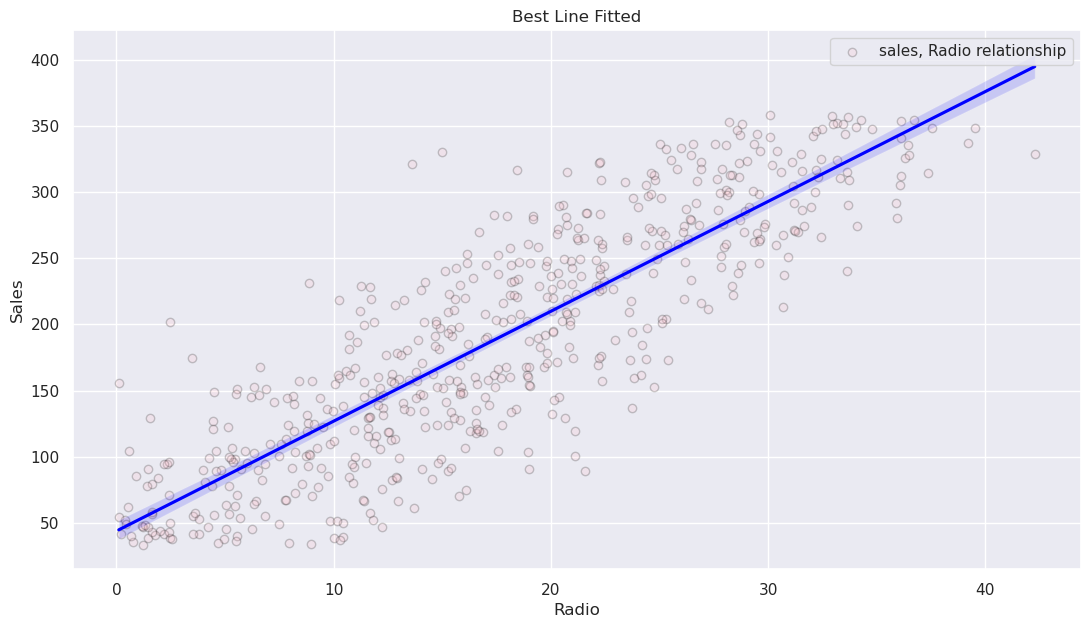

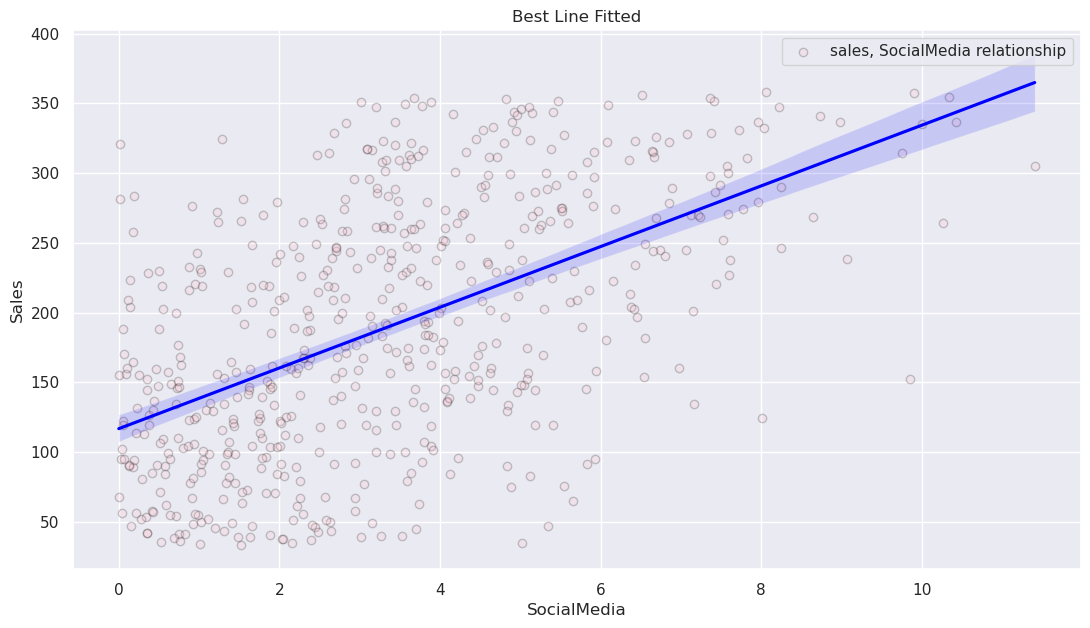

In [14]:
# Create a scatterplot for each independent variable and the dependent variable.

### YOUR CODE HERE ### 
cols = ['Radio', 'SocialMedia']

for col in cols:
    fig2, ax2 = plt.subplots(figsize=(13, 7))
    ax2.scatter(data[col], y3, c='pink', edgecolor='black', alpha=0.2, label=f'sales, {col} relationship')
    sns.regplot(x=data[col], y=y3, data=data, scatter=False, ci=95, 
        fit_reg = True, color = 'blue')
    ax2.set_title('Best Line Fitted')
    ax2.set_xlabel(col)
    ax2.set_ylabel('Sales')
    ax2.legend();

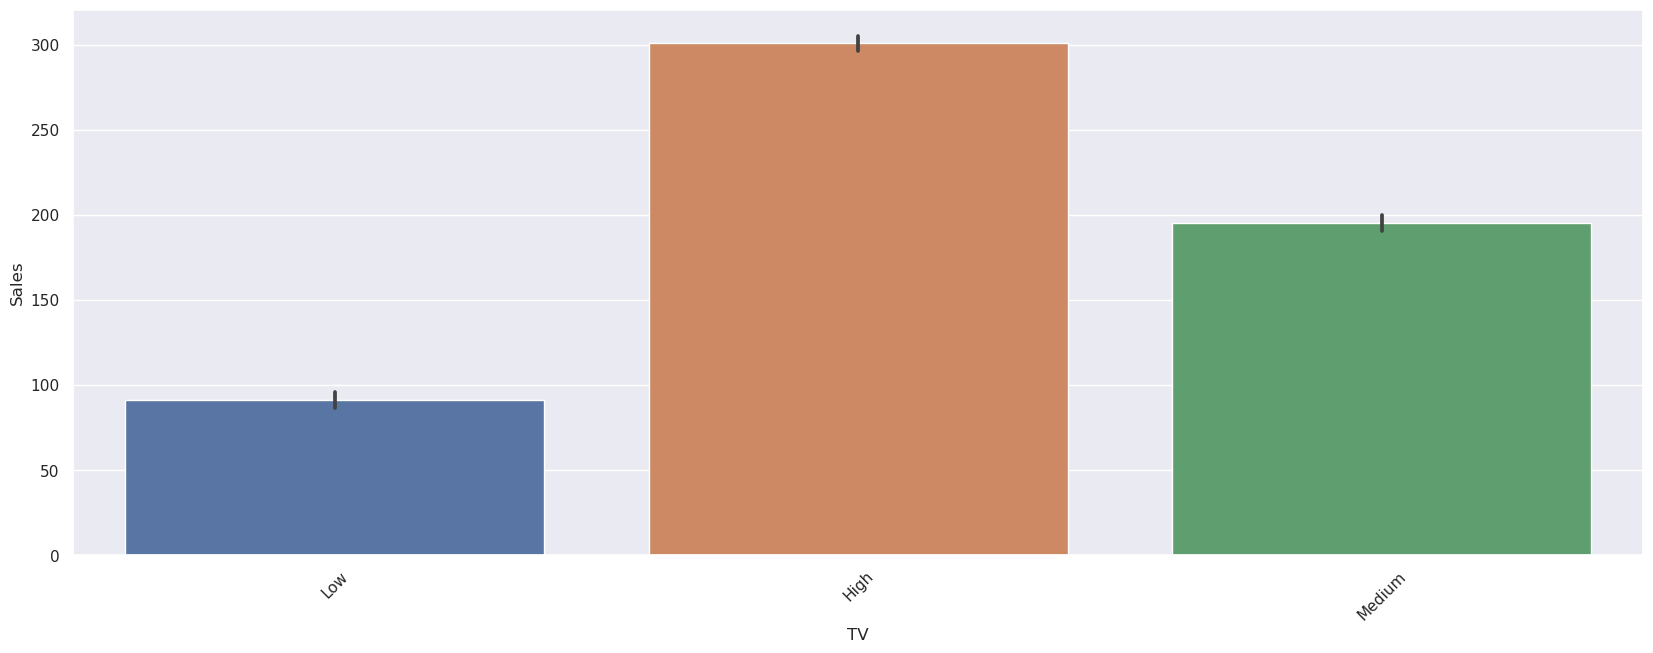

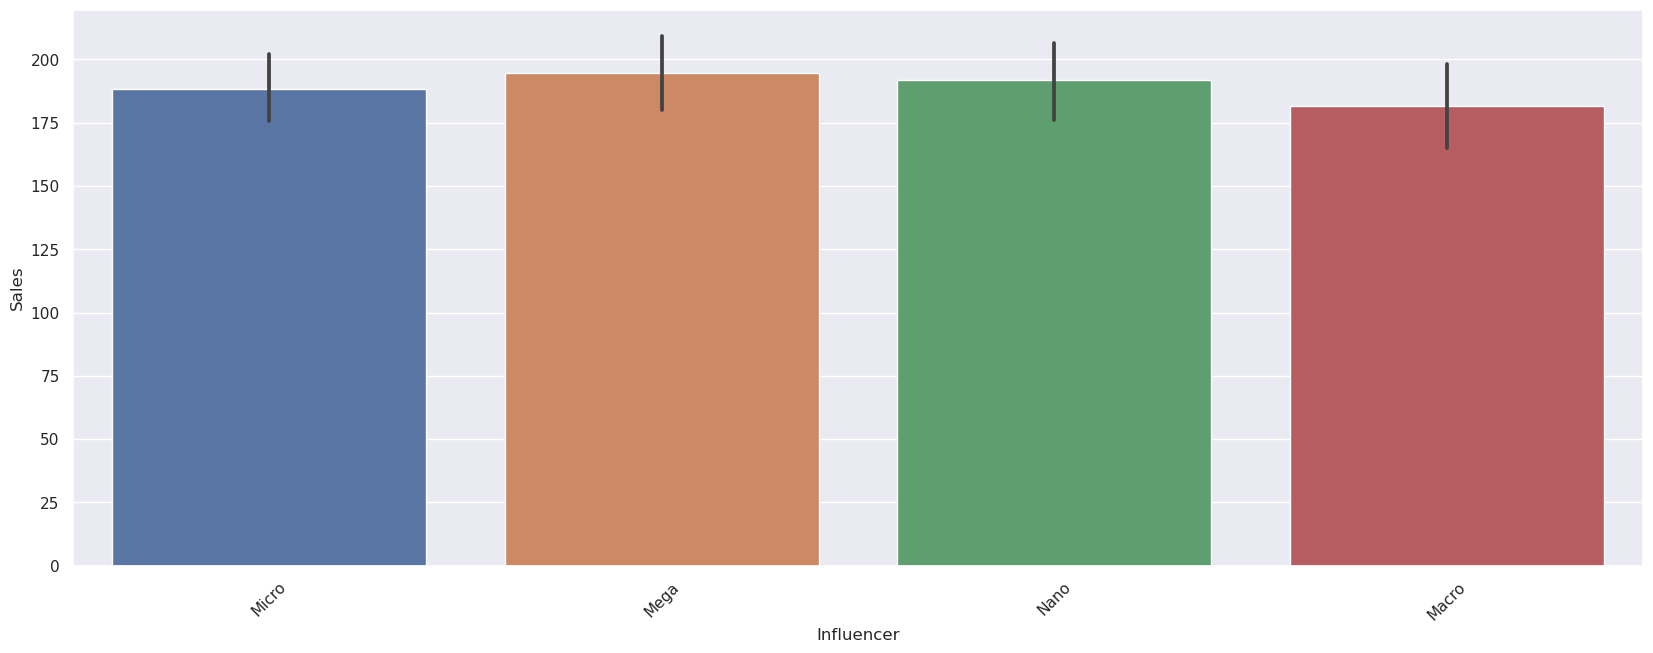

In [15]:
objs = ['TV', 'Influencer'] 
for i in objs:
    plt.figure(figsize = (18,8)) #18, 8
    sns.barplot(x=i, y=data['Sales'], data=data);
    plt.xticks(rotation=45)
    plt.tight_layout(pad=5.0)
    plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a scatterplot to display the values for two variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `scatterplot()` function in `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>
    
Pass the independent and dependent variables in your model as the arguments for `x` and `y`, respectively, in the `scatterplot()` function. Do this for each continous independent variable in your model.

</details>

**Question:** Is the linearity assumption met?


We still need more evidence to make inferences, but is looking alright, perhaps with no `Influencer`

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

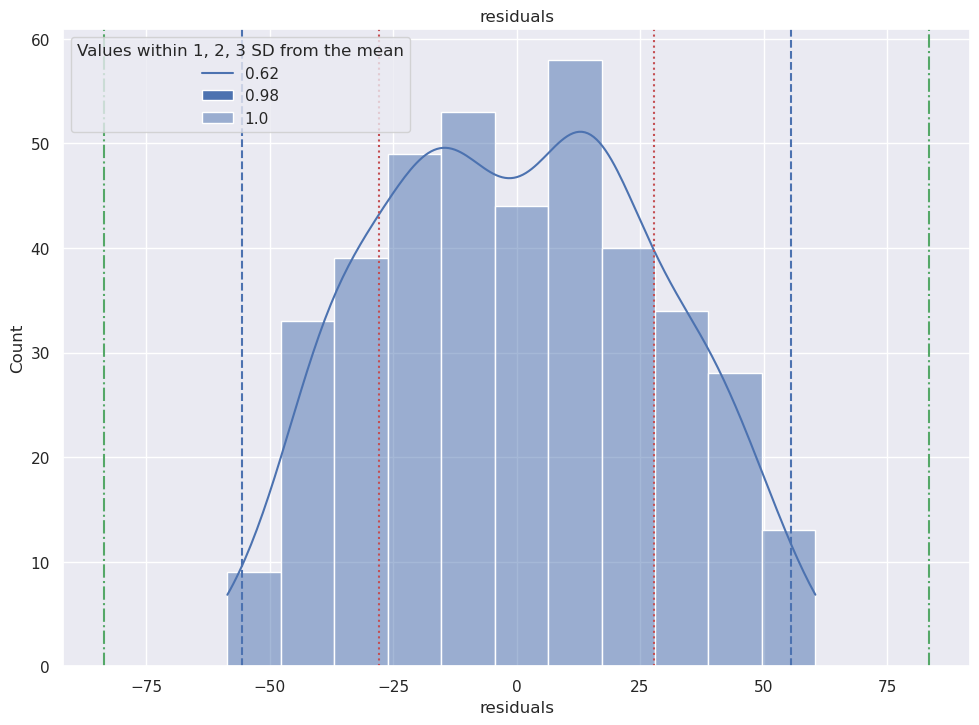

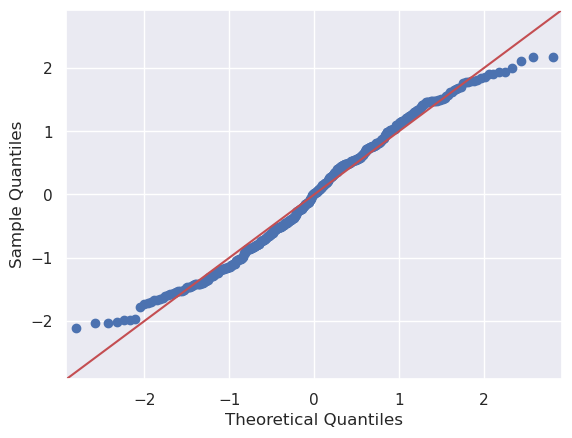

,residuals,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.62,0.680,0.060
Frac of the values within +/- 2 SD from the mean,0.98,0.950,0.030
Frac of the values within +/- 3 SD from the mean,1.00,0.997,0.003


In [16]:
# Calculate the residuals.

### YOUR CODE HERE ### 

fittedValues = model3.predict(X3)
residuals = model3.resid
residuals_df = pd.DataFrame(residuals, columns=['residuals'])


# Create a histogram with the residuals. 

### YOUR CODE HERE ### 
distribution(residuals_df, 'residuals')

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 

empirical(residuals_df, 'residuals' )

In [17]:
residuals_df['residuals'].describe()

count    4.000000e+02
mean     6.172485e-13
std      2.781213e+01
min     -5.855703e+01
25%     -2.199451e+01
50%      6.792549e-01
75%      2.099167e+01
max      6.047454e+01
Name: residuals, dtype: float64

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the Q-Q plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?



Not yet, but we are close. The empirical rule give us a good estimation.
The distribution graph looks somehow normal.
the difference between the mean and medium is retty small -0.679.
Although its looks is of normal distribution also looks like a t-distribution.
the QQ plots looks linear, almost great only the extremes values a bit off.


### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

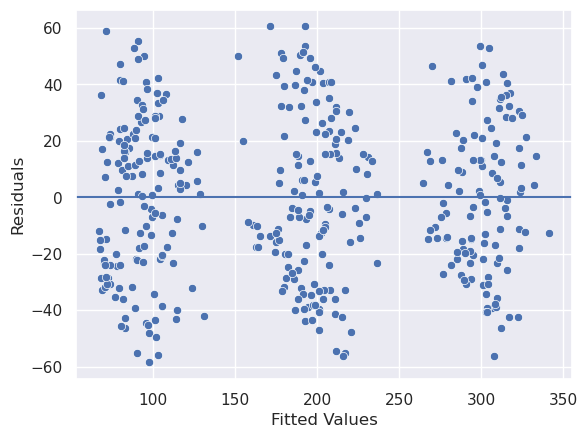

In [18]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 
fig = sns.scatterplot(x=fittedValues, y=residuals)

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance assumption met?




yes, three times.

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

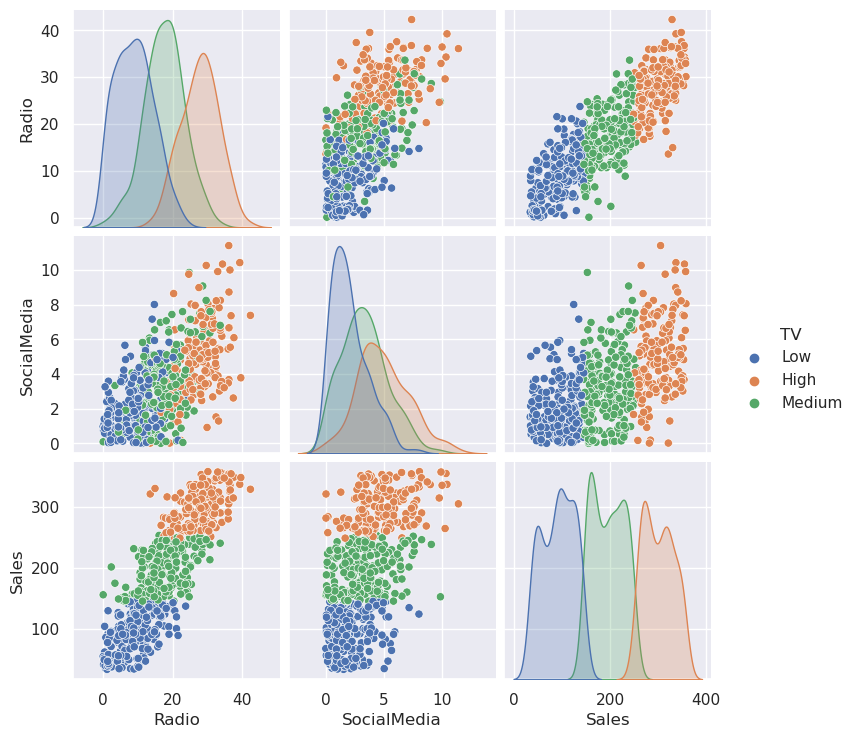

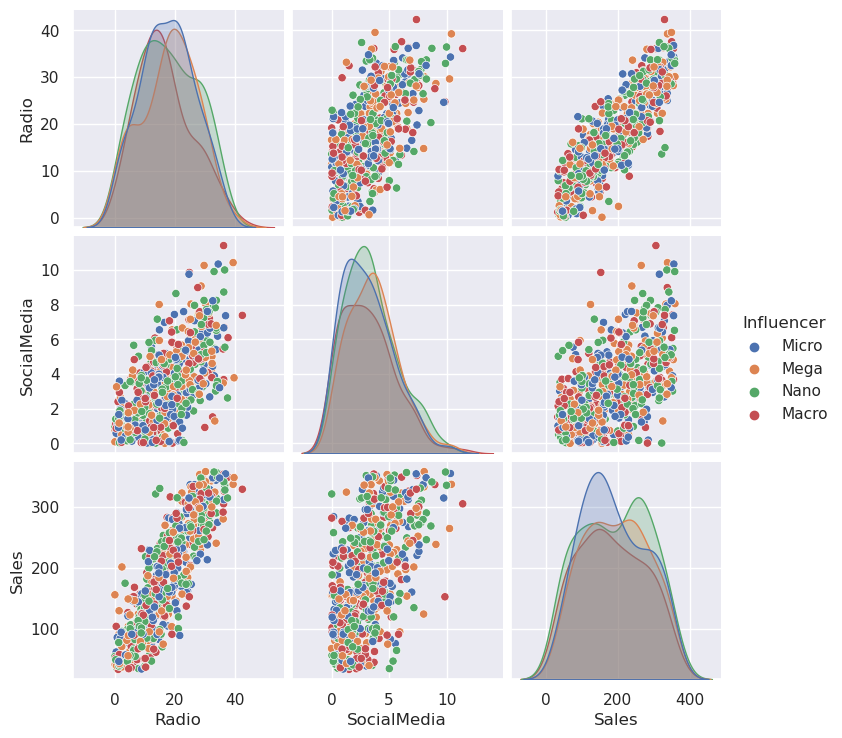

In [19]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 


sns.pairplot(data, hue='TV');
sns.pairplot(data, hue='Influencer');

In [20]:
# Calculate the variance inflation factor (optional).

### YOUR CODE HERE ### 

X3 = data[['Radio']]
y3 = data[['Sales']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X3 = add_constant(X3) # X = add_constant(df.dropna()) if missing values
#print(X)
VIF = {}
VIF['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]

pd.DataFrame(VIF["VIF"], index=X3.columns, columns=['VIF'])

,VIF
const,4.562378
Radio,1.000000


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Confirm that you previously created plots that could check the no multicollinearity assumption.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `pairplot()` function applied earlier to `data` plots the relationship between all continous variables  (e.g., between `Radio` and `Social Media`).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `statsmodels` library has a function to calculate the variance inflation factor called `variance_inflation_factor()`. 
    
When using this function, subset the data to only include the continous independent variables (e.g., `Radio` and `Social Media`). Refer to external tutorials on how to apply the variance inflation factor function mentioned previously.
 

</details>

**Question 8:** Is the no multicollinearity assumption met?



## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [21]:
# Display the model results summary.

### YOUR CODE HERE ### 

results3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1240.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          7.29e-201
Time:                        12:03:49   Log-Likelihood:                -1897.3
No. Observations:                 400   AIC:                             3803.
Df Residuals:                     396   BIC:                             3818.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         214.4941      7.726     27.763      0.000     199.305     229.683
C(TV)[T.Low]     -148.2727      6.119    -24.232      0.000    -160.302    -136.243
C(TV)[T.Medium]   -70.3024      4.499    -15.627      0.000     -79.147     -61.458
Radio               3.0084      0.254     11.858      0.000       2.510       3.507
==============================================================================
Omnibus:                       46.505   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.393
Skew:                           0.047   Prob(JB):                      0.00123
Kurtosis:                       2.109   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?


[wiki](https://en.wikipedia.org/wiki/Variance_inflation_factor)

I think The VIF quantifies how correlated 
each independent variable is with 
all the other independent variables. 
The minimum value of VIF is 1 and it can get very large. 
The larger the VIF, 
the more multicollinearity there is in the model.


### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [22]:
# Display the model results summary.

### YOUR CODE HERE ### 

results3.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,214.4941,7.726,27.763,0.000,199.305,229.683
C(TV)[T.Low],-148.2727,6.119,-24.232,0.000,-160.302,-136.243
C(TV)[T.Medium],-70.3024,4.499,-15.627,0.000,-79.147,-61.458
Radio,3.0084,0.254,11.858,0.000,2.510,3.507


**Question:** What are the model coefficients?



beta_tvlow = -148.2727

beta_tvmed = -70.3024

beta_ratio = 3.0084	

Intercept  = 214.4941

**Question:** How would you write the relationship between `Sales` and the independent variables as a linear equation?



sales = (-148.2727 * TVlow) + (-70.3024 *  TVmed) + (3.004 * Radio) + 214.4941

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



yes, they are statistically significant as their p-value is under our alpha.
and they have a CI as well per each variable.

**Question:** Why is it important to interpret the beta coefficients?



They adjust the explanatory variables to fit best fit line in the data points.

**Question:** What are you interested in exploring based on your model?



It is important to determinate what can have big effects in day to day life to minimize unwanted situations.

**Question:** Do you think your model could be improved? Why or why not? How?

Im not sure, perhaps no with out sacrificing the balance bias, variance.

## Conclusion

## Considerations

**What are some key takeaways that you learned from this lab?**

* Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
* Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
* Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions.

**What findings would you share with others?**

According to the model, high TV promotional budgets result in significantly more sales than medium and low TV promotional budgets. For example, the model predicts that a `Low` `TV` promotion is 154.2971 lower on average than a `high` `TV` promotion given the same `Radio` promotion.

The coefficient for radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. 

For example, there is a $95\%$ chance the interval $[-163.979,-144.616]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a low TV promotional budget is chosen instead of a high TV promotion budget.


**How would you frame your findings to stakeholders?**

High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by $\$75.3120$ million (95% CI $[-82.431,-68.193])$, and switching from a high to low TV promotional budget reduces sales by $\$154.297$ million (95% CI $[-163.979,-144.616])$. The model also estimates that an increase of $\$1$ million in the radio promotional budget will yield a $\$2.9669$ million increase in sales (95% CI $[2.551,3.383]$).

Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales. 



#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).